##### Import the relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
# We can override the default matplotlib styles with those of Seaborn
sns.set()## Importing the relevant libraries

##### Read the excel files and extract the relevant data

In [2]:
# Read the excel sheets
df_efw_index_raw = pd.read_excel('efw-2019-master-index-data-for-researchers.xlsx',
                             sheet_name='EFW Index 2019 Report', skiprows=4, index_col=0)

df_efw_panel_raw = pd.read_excel('efw-2019-master-index-data-for-researchers.xlsx',
                             sheet_name='EFW Panel Data 2019 Report', skiprows=2, index_col=0)

df_efw_1950_raw = pd.read_excel('efw-2019-master-index-data-for-researchers.xlsx',
                             sheet_name='EFW 1950-1965', skiprows=1, index_col=0,
                                usecols=['Year', 'Country', 'EFW', 'Rank'])
# EFW Index 2019 Report
df_efw_index_raw = df_efw_index_raw.dropna().reset_index(drop=True)
df_efw_index = df_efw_index_raw.copy()

# EFW Panel Data 2019 Report
df_efw_panel_raw = df_efw_panel_raw.dropna().reset_index(drop=True)
df_efw_panel = df_efw_panel_raw.copy()

# EFW 1950-1965
df_efw_1950_raw = df_efw_1950_raw.dropna().reset_index()
df_efw_1950 = df_efw_1950_raw.copy()

##### Question 4

In [3]:
def mov_median(df, country, column, periods):
    """
    function to return the moving median for a specified period
    """
    return df.loc[df['Countries'] == country][column].rolling(periods, min_periods=1).median()

##### Question 5

In [4]:
def get_unique_country_values(df, column):
    # Get a mean of the column for each country
    df[column] = df['Countries'].map(lambda x: \
                                              round(df.loc[df['Countries'] == x]\
                                              [column].mean(), 2))
    
    # Since the countries have duplicate corresponding values of the column
    # Drop the duplicates
    # Sort by Top marginal income tax rate and pick the top 20 for plotting
    df = df.drop_duplicates(['Countries']).sort_values(by=[column],
                                                          ascending=False)
    return df
    

###### 5.1

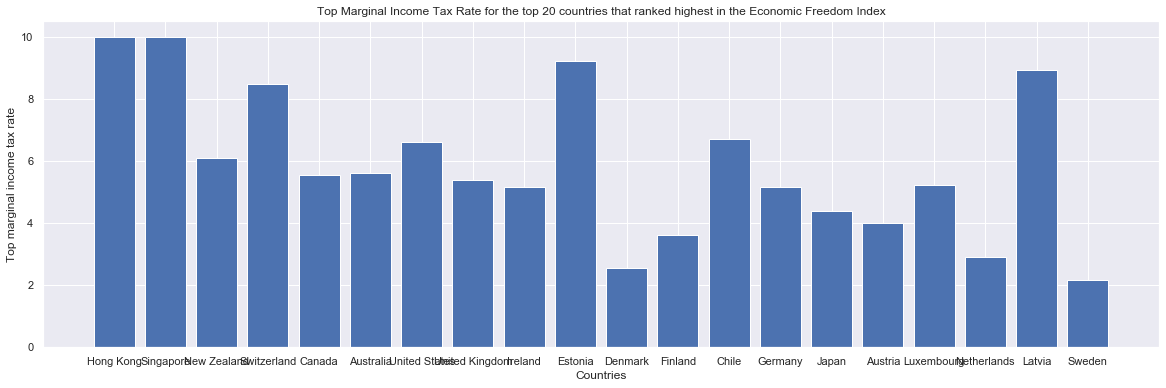

In [5]:
# a bar chart that displays the Top Marginal Income Tax Rate for the top 20 countries that ranked highest in
# the Economic Freedom Index
df_efw_index['Top marginal income tax rate'] = df_efw_index['Countries'].map(lambda x: \
                                              round(df_efw_index.loc[df_efw_index['Countries'] == x]\
                                              ['Top marginal income tax rate'].mean(), 2))
df_efw_index_marginal = get_unique_country_values(df_efw_index, 'Economic Freedom Summary Index').iloc[0:20,]

plt.figure(figsize=(20, 6))
plt.xlabel("Countries")
plt.ylabel("Top marginal income tax rate")
plt.title("Top Marginal Income Tax Rate for the top 20 countries that ranked highest in the Economic Freedom Index")
plt.bar(df_efw_index_marginal['Countries'], df_efw_index_marginal['Top marginal income tax rate']);
plt.show()

###### 5.2

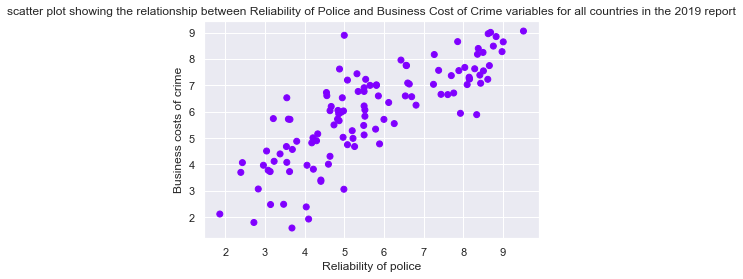

In [6]:
# The second plot should show, as a scatter plot the relationship between "Reliability of Police" and
# "Business Cost of Crime variables for all countries in the 2019 report

df_efw_index['Reliability of police'] = df_efw_index['Countries'].map(lambda x: \
                                          round(df_efw_index.loc[df_efw_index['Countries'] == x]\
                                          ['Reliability of police'].mean(), 2))

df_efw_index_police_business = get_unique_country_values(df_efw_index, 'Business costs of crime')


plt.xlabel("Reliability of police")
plt.ylabel("Business costs of crime")
plt.title("scatter plot showing the relationship between Reliability of Police and Business Cost \
of Crime variables for all countries in the 2019 report")
plt.scatter(df_efw_index_police_business['Reliability of police'],
            df_efw_index_police_business['Business costs of crime'],
            c=df_efw_index_police_business['Countries'].value_counts(),cmap='rainbow');
plt.show()

###### 5.3

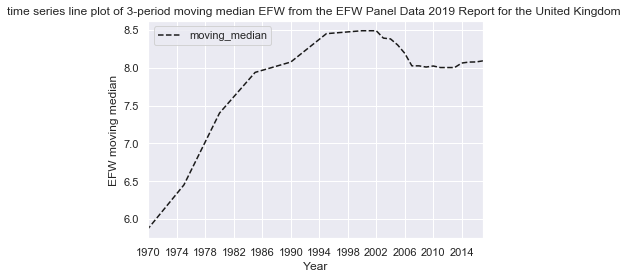

In [7]:
df_efw_panel_ = df_efw_panel.copy()

# Create a `moving_median` column for EFW the UK 
df_efw_panel_['moving_median'] = mov_median(df_efw_panel_, 'United Kingdom', 'EFW', 3)
df_efw_panel_UK = df_efw_panel_.loc[df_efw_panel['Countries'] == 'United Kingdom'][['Year', 'moving_median']]

# Plot the time series line
df_efw_panel_UK.plot(style="k--", x='Year', y='moving_median');
plt.xlabel('Year')
plt.ylabel('EFW moving median')
plt.title("time series line plot of 3-period moving median EFW from the \
EFW Panel Data 2019 Report for the United Kingdom ")
plt.xticks(range(df_efw_panel_UK['Year'].min(), df_efw_panel_UK['Year'].max(), 4))
plt.legend();
plt.show();

> ##### Important insight
***
- From the bar graph, we can see that the highest top marginal income tax rate was recorded in the Asian and European countries such as Hong Kong, Latvia, Estonia, Singapore, and Switzerland. On the other hand, the lowest Top marginal income tax rate was recorded in Scandinavian countries like Denmark and Sweden
***
- From the scatter plot, we can see that for most countries, the Reliability of Police and Business Cost of Crime variables are average to high. Very few countries have both low Police and Business Cost of Crime. The higher the reliability of police, the higher the cost of business
***
- From the time series graph, we can see that the moving median of EFW for the UK rapidly increased till 1985 and then started slowing down until it reached it's optimum in 1998. After that, it rapidly dropped till 2007 and then leveled up till 2014 when it started rising at a very slow rate.